In [1]:
#1. SelectKBest사용하기
#2. importance Scoring 사용
#3. seaborn으로 hitmap만들어서 연관성 보기 -> 이렇게 하면서 특징 추출.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
#pd.set_option('display.max_columns', None) # all row
#pd.set_option('display.max_rows', None) # all column
#NEAR BAY, INLAND, <1H OCEAN, NEAR OCEAN  total 4 cases, we use one-hot-encoding each 0,1,2,3
data = pd.read_csv('C:/Users/ksmin/data_Science/dataset/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
# Convert categorical values to numerical values
data['ocean_proximity'] = data['ocean_proximity'].map({'NEAR BAY': 0, 'INLAND': 1, '<1H OCEAN': 2, 'OTHER': 3})

X = data.iloc[:, 0:9]
y = data.iloc[:, -1]

X.fillna(X.mean(), inplace=True)

# Fill NaN values in y with mean
y.fillna(y.mean(), inplace=True)

X[X<0] = 0

In [16]:
print(y.dtype)
# 정수로 변환
y = y.astype(int)

float64


In [22]:
# Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X, y)

# Create a DataFrame with column names and corresponding scores
dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fit.scores_)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

# Print the top 5 best features
print(featureScores.nlargest(9, 'Score'))

                Specs         Score
8  median_house_value  1.731993e+08
5          population  1.321876e+05
3         total_rooms  2.412385e+04
6          households  1.094681e+04
2  housing_median_age  9.432285e+03
4      total_bedrooms  3.716954e+03
7       median_income  8.043547e+02
1            latitude  6.674233e+02
0           longitude           NaN


[0.         0.36529631 0.10481541 0.06627277 0.05857455 0.0658098
 0.06023962 0.0762933  0.20269823]


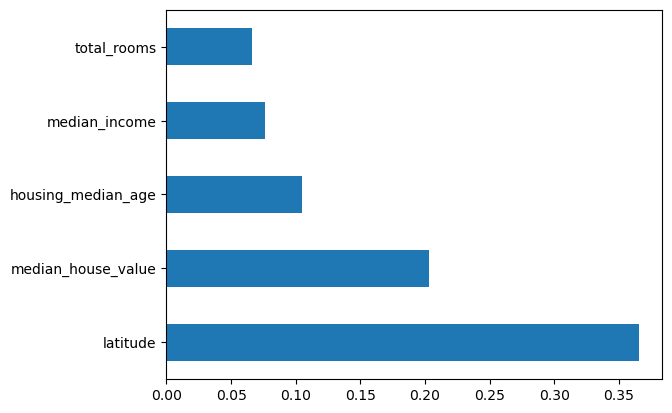

In [23]:
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use built-in class feature_importances of tree-based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

plt.show()

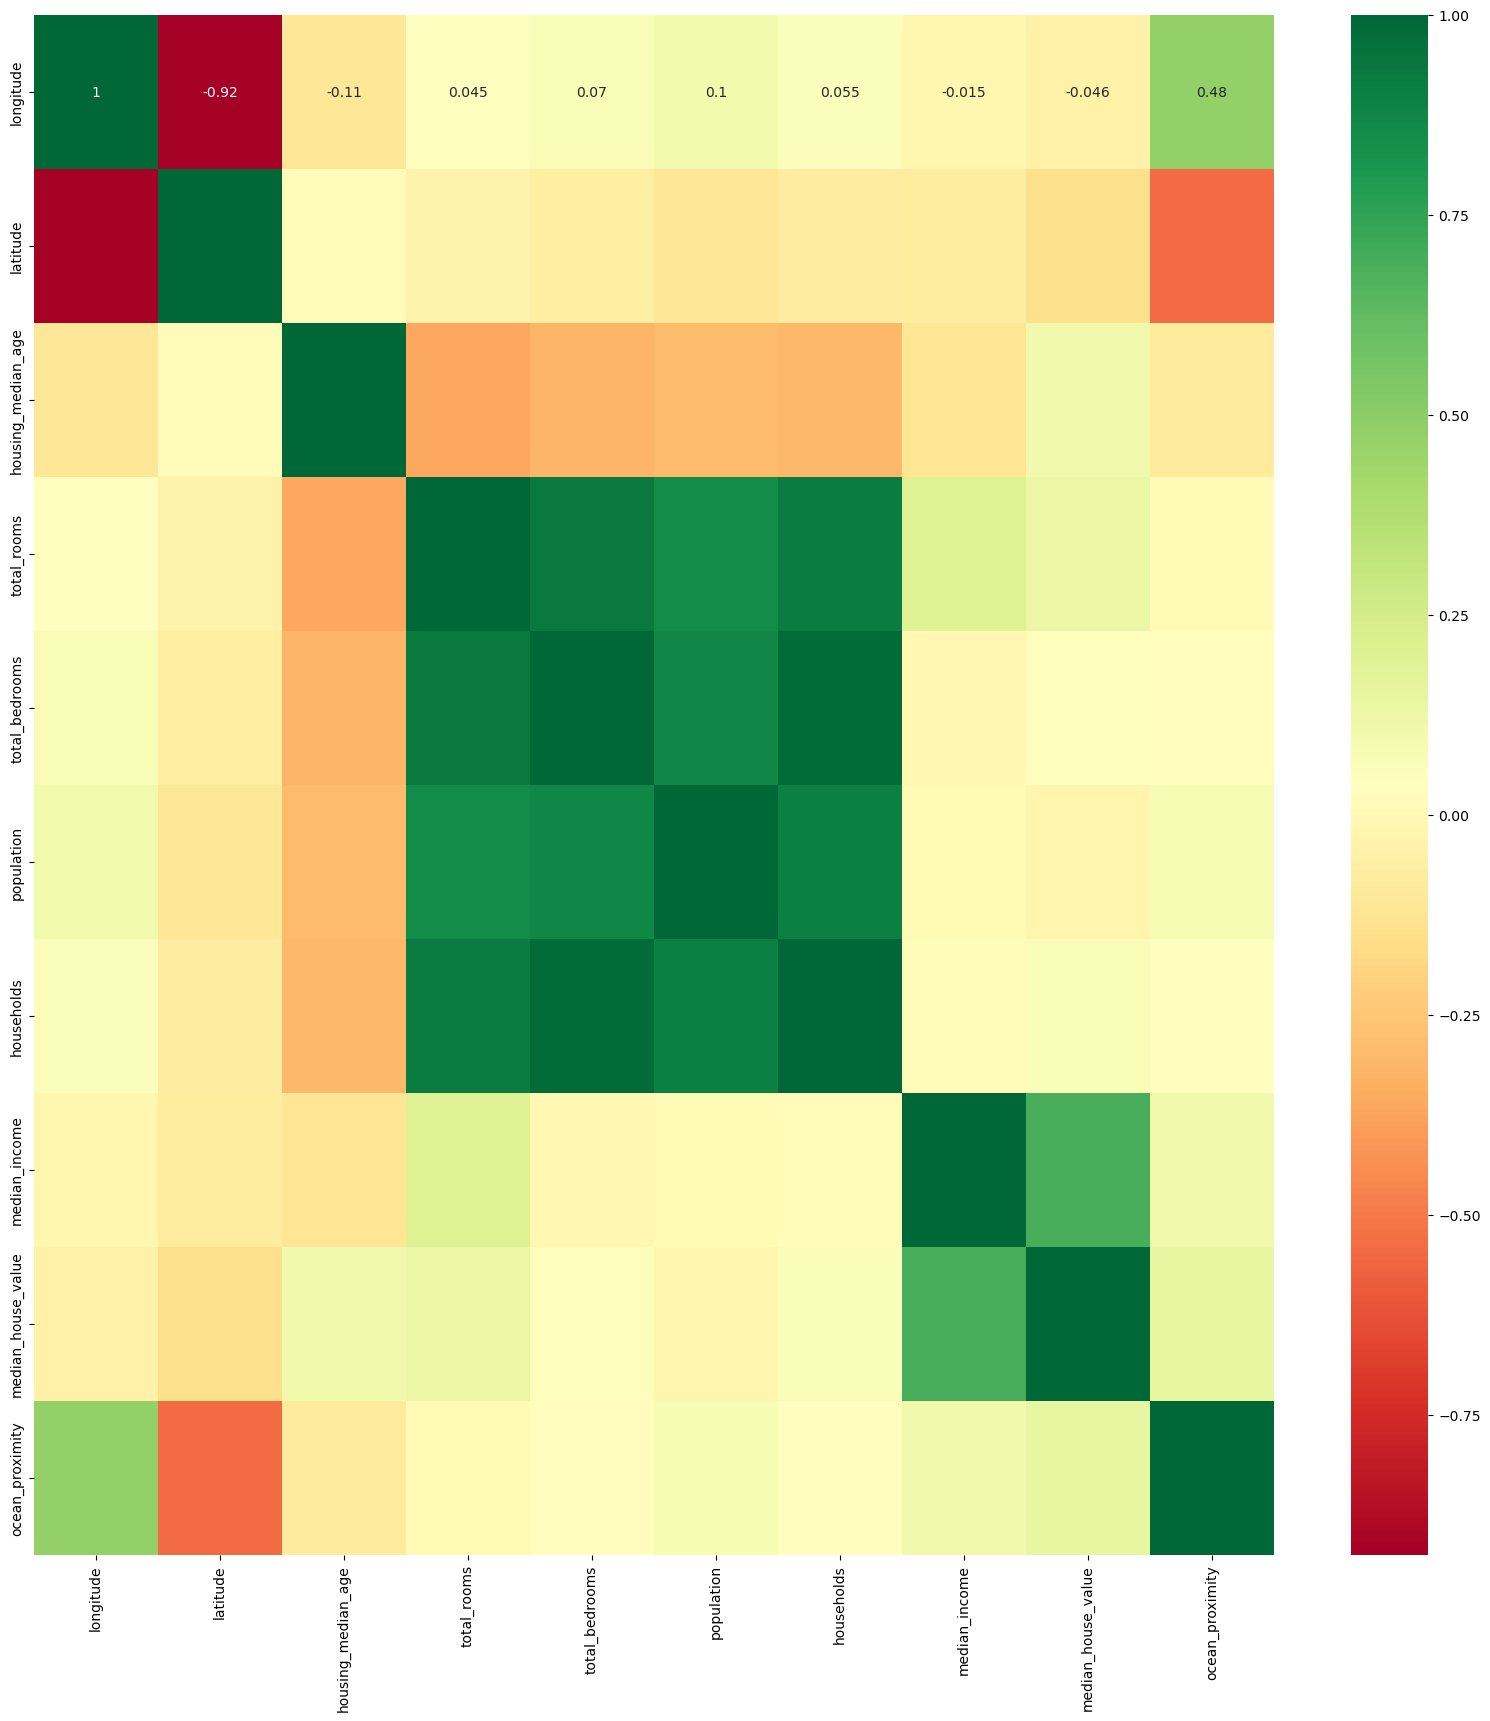

In [24]:
#seaborn으로 hitmap 만들기.
#get correlations of pairs of features in the dataset
corrmat = data.corr() #corr() computes pairwise  correlations of features in a Data Frame
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot the heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")